# check images going into/coming out of GLM

K. Garner 2022  

Sanity check images for first-level GLM analysis.

- plot smoothed images with spm generated brain mask to check what is going into the GLM

## import required tools

In [9]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt 
import nilearn.image as img

## define subject and session variables for plotting data

In [13]:
sub = '01'
fpath = '/scratch/qbi/uqkgarn1/data/derivatives/spm/'
epi_tmplt = 'ssub-%s_ses-02_task-attlearn_run-%s_space-MNI152NLin2009cAsym_desc-preproc_bold.nii'
msk_tmplt = 'mask.nii'

## define function to plot epi with mask as contours

In [16]:
def plot_epi_w_mask(fpath, sub, run, epi_tmplt, msk_tmplt, axes=None):
    # plot epi with mask as contours
    # Args
    # -- fpath: [str] path to BIDS format data
    # -- sub: [str] subject number to plot, e.g. '01'
    # -- run: [str] epi run number, e.g. '1'
    # -- epi_tmplt: [str] template of epi file name
    # -- msk_tmplt: [str] template of mask file name
    # Returns
    # -- epi plotted with mask as contours
    
    # sort path variables
    epath = ''.join([fpath, 'sub-%s/ses-02/data/'])
    epath = epath % sub
    eim = epi_tmplt % (sub, run)
    efull = ''.join([epath, eim])
    
    mpath = ''.join([fpath, 'sub-%s/ses-02/flglm/'])
    mpath = mpath % (sub)
    mfull = ''.join([mpath, msk_tmplt])   
    spath = ''.join([fpath, 'images/'])
    sim = eim.split(".")[0]
    sfull = ''.join([spath, sim, '.png']) 
    
    # get mean epi image
    epi = img.mean_img(efull)
    
    # plot, save and return
    disp = niplt.plot_epi(epi_img = epi, 
                          display_mode = 'tiled',
                          title = ''.join(['sub-', sub]))
    disp.add_contours(mfull, levels=[.5], colors='r')
    disp.savefig(sfull)
    return disp                        

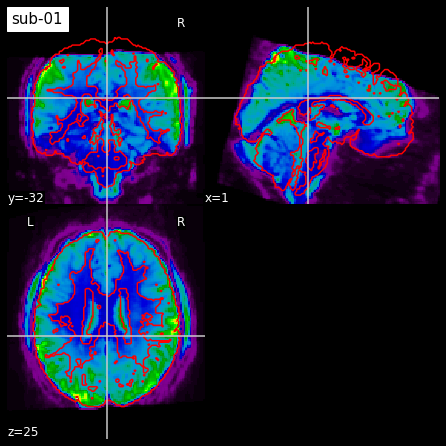

In [17]:
plot_epi_w_mask(fpath, sub, '1', epi_tmplt, msk_tmplt)

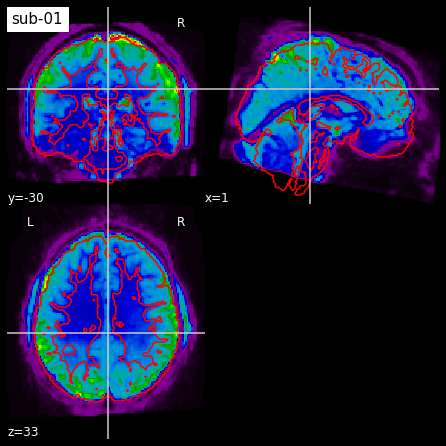

In [18]:
plot_epi_w_mask(fpath, sub, '2', epi_tmplt, msk_tmplt)

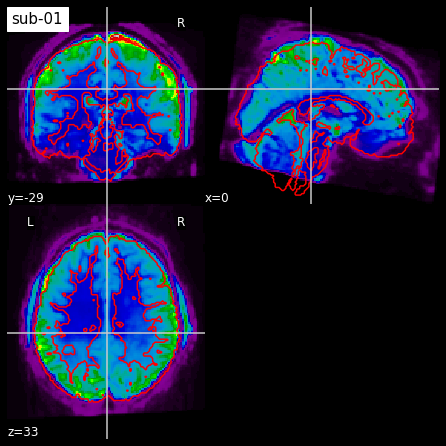

In [19]:
plot_epi_w_mask(fpath, sub, '3', epi_tmplt, msk_tmplt)